# Selenium的使用
Selenium是一个自动化测试工具，利用它可以驱动浏览器执行特定的动作，如点击、下拉等操作，同时还可以获取浏览器当前呈现的页面的源代码，做到可见即可爬。对于一些JavaScript动态渲染的页面来说，此种抓取方式非常有效。

## 1.准备工作
本节以Chrome为例讲解Selenium的用法。在开始之前，请确保已经正确安装好了Chrome浏览器并配置好了Chrome Driver。另外还需要正确安装好Python的Selenium库

## 2.基本使用

https://www.baidu.com/s?ie=utf-8&f=8&rsv_bp=1&rsv_idx=1&tn=baidu&wd=Python&fenlei=256&rsv_pq=a421934f00189a7f&rsv_t=7f04HivdwyPpuGmiuuaor%2BoGT759%2FMYeDwi%2FSYblV9ZE104PwV0rNY0HpfM&rqlang=cn&rsv_enter=1&rsv_dl=tb&rsv_sug3=6&rsv_sug2=0&rsv_btype=i&inputT=90&rsv_sug4=91
[{'domain': 'www.baidu.com', 'httpOnly': False, 'name': 'BDSVRTM', 'path': '/', 'secure': False, 'value': '129'}, {'domain': '.baidu.com', 'expiry': 1621060289, 'httpOnly': False, 'name': 'BA_HECTOR', 'path': '/', 'secure': False, 'value': '0tah8l0l818kahekus1g9un5h0r'}, {'domain': '.baidu.com', 'httpOnly': False, 'name': 'H_PS_PSSID', 'path': '/', 'secure': False, 'value': '33986_33970_34004_33607'}, {'domain': '.baidu.com', 'httpOnly': False, 'name': 'PSINO', 'path': '/', 'secure': False, 'value': '3'}, {'domain': '.baidu.com', 'expiry': 3768540334, 'httpOnly': False, 'name': 'PSTM', 'path': '/', 'secure': False, 'value': '1621056687'}, {'domain': '.baidu.com', 'expiry': 3768540334, 'httpOnly': False, 'name': 'BIDUPSID
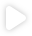
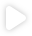
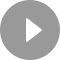

In [16]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.wait import WebDriverWait
import time

browser = webdriver.Chrome()
try:
    browser.get('https://www.baidu.com')
    input = browser.find_element_by_id('kw')
    input.send_keys('Python')
    input.send_keys(Keys.ENTER)
    wait = WebDriverWait(browser, 10)
    wait.until(EC.presence_of_all_elements_located((By.ID, 'content_left')))
    print(browser.current_url)
    print(browser.get_cookies())
    print(browser.page_source)
finally:
    browser.close()

运行代码，会自动弹出一个Chrome浏览器。浏览器首先会跳转到百度，然后在搜索框中输入Python，接着跳转到搜索页面，搜索结果加载出来后，控制台会分别输出当前的URL、当前的Cookies和网页源代码。

## 3.声明浏览器对象
Selenium支持非常多的浏览器，如Chrome、Firefox、Edge等，还有Android、BlackBerry等手机端浏览器。另外页支持无界面浏览器PhantomJS

此外，我们可以用如下方式初始化：
    
    from selenium import webdriver
    
    browser = webdriver.Chrome()
    browser = webdriver.Firefox()
    browser = webdriver.Edge()
    browser = webdriver.PhantomJS()
    browser = webdriver.Safari()
    
这样就完成了浏览器对象的初始化并将其赋值为browser对象。接下来，我们要做的就是调用browser对象，让其执行各个动作以模拟浏览器操作



## 4.访问页面

In [17]:
#我们可以用get()方法来请求网页，参数传入链接URL即可。比如，用get()方法访问淘宝，然后打印源代码
from selenium import webdriver

browser = webdriver.Chrome()
browser.get('https://www.taobao.com')
print(browser.page_source)
browser.close()

<html lang="zh-CN" class="ks-webkit537 ks-webkit ks-chrome90 ks-chrome"><head><script src="https://ecpm.tanx.com/ex?i=mm_12852562_1778064_48458242&amp;cb=jsonp_callback_54855&amp;r=&amp;cg=a95c2ed1023359992436d4462a24e205&amp;pvid=a1e498912959d0ea96cf3f83c2bd90d9&amp;u=https%3A%2F%2Fwww.taobao.com%2F&amp;psl=1&amp;nk=&amp;sk=&amp;refpid=&amp;pcabid=12192864" async=""></script><script src="https://ecpm.tanx.com/ex?i=mm_12852562_1778064_48432768&amp;cb=jsonp_callback_52151&amp;r=&amp;cg=a759263ab9015b5e9faaa6794964e3bd&amp;pvid=a1e498912959d0ea96cf3f83c2bd90d9&amp;u=https%3A%2F%2Fwww.taobao.com%2F&amp;psl=1&amp;nk=&amp;sk=&amp;refpid=&amp;pcabid=12192864" async=""></script><script src="https://ecpm.tanx.com/ex?i=mm_12852562_1778064_48868196&amp;cb=jsonp_callback_99948&amp;r=&amp;cg=afa08efa96a463a64579690e7f9c42c1&amp;pvid=a1e498912959d0ea96cf3f83c2bd90d9&amp;u=https%3A%2F%2Fwww.taobao.com%2F&amp;psl=1&amp;nk=&amp;sk=&amp;refpid=&amp;pcabid=12192864" async=""></script><script src="https:

运行后发现，弹出了浏览器并且自动访问了淘宝，然后控制台输出了淘宝页面的源代码，随后浏览器关闭

## 5.查找节点
Selenium可以驱动浏览器完成各种操作，比如填充表单、模拟点击等。Selenium提供了一系列查找节点的方法，我们可以用这些方法来获取想要的节点，以便下一步执行一些动作或提取信息

### ·单个节点
比如，想要从淘宝页面中提取搜索框这个节点，首先要观察它的源代码，可以发现它的id是q，name也是q。此外还有其他属性，此时我们就可以用多种方式获取它了。另外，还有根据XPath、CSS选择器等获取的方式

In [19]:
from selenium import webdriver

browser = webdriver.Chrome()
browser.get('https://www.taobao.com')
input_first = browser.find_element_by_id('q')
input_sencod = browser.find_element_by_css_selector('#q')
inpit_third = browser.find_element_by_xpath('//*[@id="q"]')
print(input_first, input_sencod, inpit_third)
browser.close()

<selenium.webdriver.remote.webelement.WebElement (session="591f7bc4f275e828c6c20775ddcc4f03", element="55a072bd-7b9f-4f61-bd39-f534a0dc975e")> <selenium.webdriver.remote.webelement.WebElement (session="591f7bc4f275e828c6c20775ddcc4f03", element="55a072bd-7b9f-4f61-bd39-f534a0dc975e")> <selenium.webdriver.remote.webelement.WebElement (session="591f7bc4f275e828c6c20775ddcc4f03", element="55a072bd-7b9f-4f61-bd39-f534a0dc975e")>


这里我们使用3种方式获取输入框，分别是根据ID、CSS选择器和XPath获取，它们返回的结果完全一致

这里列出所有获取单个节点的方法：
    
    find_element_by_id
    find_element_by_name
    find_element_by_xpath
    find_element_by_link_text
    find_element_by_partial_link_text
    find_element_by_tag_name
    find_element_by_class_name
    find_element_by_css_selector
    
另外，Selenium还提供了通用方法find_element()，它需要传入两个参数：查找方式By和值。实际上，它就是find_element_by_id()这种方法的通用函数版本，比如find_elemen_by_id(id)就等价于find_element(By.ID, id)，二者得到的结果完全一致

In [20]:
from selenium import webdriver
from selenium.webdriver.common.by import By

browser = webdriver.Chrome()
browser.get('https://www.taobao.com')
input_first = browser.find_element(By.ID, 'q')
print(input_first)
browser.close()

<selenium.webdriver.remote.webelement.WebElement (session="579ed2a056f93aa13e45553ac78c9751", element="6ece611a-03c6-4ce6-860d-86e4c892a3d3")>


### ·多个节点
如果查找的目标在网页中只有一个，那么完全可以用find_element()方法。但如果有多个节点，再用find_element()方法查找，就只能得到第一个节点。如果要查找所有满足条件的节点，需要用find_elements()这样的方法。注意，在这个方法的名称中，elements多了一个s，注意区分

In [22]:
from selenium import webdriver

browser = webdriver.Chrome()
browser.get('https://www.taobao.com')
lis = browser.find_elements_by_css_selector('.service-bd li')
print(lis)
browser.close()

[<selenium.webdriver.remote.webelement.WebElement (session="3c96b0e68b80d2813f09321274c7aa04", element="c6fdb0c2-90ac-4bcf-95f3-ca1dd5c5752c")>, <selenium.webdriver.remote.webelement.WebElement (session="3c96b0e68b80d2813f09321274c7aa04", element="4907c902-a36a-4a6b-a121-8110d589604d")>, <selenium.webdriver.remote.webelement.WebElement (session="3c96b0e68b80d2813f09321274c7aa04", element="625ab2b0-e291-4e60-a9ad-d70d2a8c07f2")>, <selenium.webdriver.remote.webelement.WebElement (session="3c96b0e68b80d2813f09321274c7aa04", element="6b1acc97-e815-492c-af3f-ba811c3ddaac")>, <selenium.webdriver.remote.webelement.WebElement (session="3c96b0e68b80d2813f09321274c7aa04", element="d32c38f0-d94d-4c15-aed0-dc296e0ce9de")>, <selenium.webdriver.remote.webelement.WebElement (session="3c96b0e68b80d2813f09321274c7aa04", element="38ae6f0f-1b18-410d-8b82-aa707816f3aa")>, <selenium.webdriver.remote.webelement.WebElement (session="3c96b0e68b80d2813f09321274c7aa04", element="75a77efc-3b21-4a90-b193-9153bf1b

可以看到，得到的内容变成了列表类型，列表中的每个节点都是WebElement类型
也就是说，如果我们用find_element()方法，只能获取匹配的第一个节点，结果是WebElement类型。如果用find_elements()方法，则结果是列表类型，列表中的每个节点是WebElement类型

这里列出所有获取多个节点的方法：

    find_elements_by_id
    find_elements_by_name
    find_elements_by_xpath
    find_elements_by_link_text
    find_elements_by_partial_link_text
    find_elements_by_tag_name
    find_elements_by_class_name
    find_elements_by_css_selector
    
当然，我们也可以直接使用find_elements()方法来选择，这时也可以这样写：
    
    lis = browser.find_elements(By.CSS_SELECTOR, '.service-bd li')
    
结果是完全一致的

## 6.节点交互
Selenium可以驱动浏览器来执行一些操作，也就是说可以让浏览器模拟执行一些动作。比较常见的用法有：输入文字时用send_keys()方法，清空文字时用clear()方法，点击按钮时用click()方法。

In [23]:
from selenium import webdriver
import time

browser = webdriver.Chrome()
browser.get('https://www.taobao.com')
input = browser.find_element_by_id('q')
input.send_keys('iPhone')
time.sleep(1)
input.clear()
input.send_keys('iPad')
button = browser.find_element_by_class_name('btn-search')
button.click()

这里首先驱动浏览器打开淘宝，然后用find_element_by_id()方法获取输入框，然后用send_keys()方法输入iPhone文字，等待一秒用clear()方法清空输入框，再次调用send_keys()方法输入iPad文字，之后再用find_element_by_class_name()方法获取搜索按钮，最后调用click()方法完成搜索动作

## 7.动作链
在上面的实例中，一些交互动作都是针对某个节点执行的。比如，对于输入框，我们就调用它的输入文字和清空文字方法；对于按钮，就调用它的电解方法。其实，还有另外一些操作，它们没有特定的执行对象，比如鼠标拖拽、键盘按键等，这些动作用另外一种方式来执行，那就是动作链

In [2]:
#比如，现在实现一个节点的拖拽操作，将某个节点从一处拖到另外一处
from selenium import webdriver
from selenium.webdriver import ActionChains

browser = webdriver.Chrome()
url = 'http://www.runoob.com/try/try.php?filename=jqueryui-api-droppable'
browser.get(url)
browser.switch_to_frame('iframeResult')
source = browser.find_element_by_css_selector('#draggable')
target = browser.find_element_by_css_selector('#droppable')
actions = ActionChains(browser)
actions.drag_and_drop(source, target)
actions.perform()

<ipython-input-2-48e6321c669c>:8: DeprecationWarning: use driver.switch_to.frame instead
  browser.switch_to_frame('iframeResult')


首先，打开网页中的一个拖曳实例，然后依次选中要拖曳的节点和拖曳到的目标节点，接着声明ActionChains对象并赋值为actions变量，然后通过调用actions变量的drag_and_drop()方法，再调用perform()方法去执行动作，此时就完成了拖曳操作

## 8.执行JavaScript

In [1]:
#Selenium还可以模拟运行JavaScript，下拉进度条
from selenium import webdriver

browser = webdriver.Chrome()
browser.get('https://www.zhihu.com/explore')
browser.execute_script('window.scrollTo(0, document.body.scrollHeight)')
browser.execute_script('alert("To Bottom")')

SessionNotCreatedException: Message: session not created: This version of ChromeDriver only supports Chrome version 89
Current browser version is 95.0.4638.54 with binary path /Applications/Google Chrome.app/Contents/MacOS/Google Chrome


这里就利用了execute_script()方法将进度条下拉到最底部，然后弹出alert提示框
所以说有了这个方法，基本上API没有提供的所有功能都可以用执行JavaScript的方式来执行

## 9.获取节点信息
前面说过，通过page_source属性可以获取网页的源代码，接着就可以用解析库（如正则表达式、Beautiful Soup、pyquery等）来提取信息了。

不过，既然Selenium已经提供了选择节点的方法，返回的是WebElement类型，那么它也有相关的方法和属性来直接提取节点信息，如属性、文本等。这样的话，我们就可以不通过解析源代码来提取信息了。

### ·获取属性

In [8]:
#使用get_attribute()方法来获取节点的属性，但是其前提是先选中这个节点
from selenium import webdriver
from selenium.webdriver import ActionChains

browser = webdriver.Chrome()
url = 'https://www.baidu.com'
browser.get(url)
logo = browser.find_element_by_id('s_lg_img_new')
print(logo)
print(logo.get_attribute('class'))

<selenium.webdriver.remote.webelement.WebElement (session="8a471bf5625c712fdcacf168c425113d", element="6f3fcb1f-2359-41af-aeee-7e25abe9e943")>
index-logo-srcnew


运行之后，程序便会驱动浏览器打开百度页面，然后获取百度logo节点，最后打印出它的class

通过get_attribute()方法，然后传入想要获取的属性名，就可以得到它的值了



### ·获取文本值
每个WebElment节点都有text()属性，直接调用这个属性就可以得到节点内部的文本信息，这相当于Beautiful Soup的get_text()方法、pyquery的text()方法

In [13]:
from selenium import webdriver

browser = webdriver.Chrome()
url = 'https://www.zhihu.com/explore'
browser.get(url)
input = browser.find_element_by_class_name('ExploreHomePage-ContentSection-header')
print(input.text)

最新专题


这里打开知乎页面，然后获取“最新专题”按钮这个节点，再将其文本值打印出来  


### ·获取id、位置、标签名和大小
另外，WebElement节点还有一些属性，比如id属性可以获取节点id，location属性可以获取该节点在页面中的相对位置，tag_name属性可以获取标签名称，size属性可以获取节点的大小，也就是宽高，这些属性有时候还是很有用的

In [14]:
from selenium import webdriver

browser = webdriver.Chrome()
url = 'https://www.zhihu.com/explore'
browser.get(url)
input = browser.find_element_by_class_name('ExploreHomePage-ContentSection-header')
print(input.id)
print(input.location)
print(input.tag_name)
print(input.size)

9d2840f8-e18f-4f7a-90f7-12a76cda463c
{'x': 100, 'y': 84}
div
{'height': 36, 'width': 1000}


这里首先获得“最新专题”按钮这个节点，然后调用其id、location、tag_name、size属性来获取对应的属性值

##  10.切换Frame
我们知道网页中有一种节点叫作iframe，也就是子Frame，相当于页面的子页面，它的结构和外部网页的结构完全一致。Selenium打开页面后，它默认是在父级Frame里面操作，而此时如果页面中还有Frame，它是不能获取到子Frame里面的节点的。这是就需要使用switch_to.frame()方法来切换Frame。

In [16]:
import time
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException

browser = webdriver.Chrome()
url = 'http://www.runoob.com/try/try.php?filename=jqueryui-api-droppable'
browser.get(url)
browser.switch_to_frame('iframeResult')
try:
    logo = browser.find_element_by_class_name('logo')
except NoSuchElementException:
    print('No LOGO')
browser.switch_to.parent_frame()
logo = browser.find_element_by_class_name('logo')
print(logo)
print(logo.text)

No LOGO
<selenium.webdriver.remote.webelement.WebElement (session="ee38db62399767d5f61acc113e6f9cd4", element="0169dde1-96bb-4f9d-9d12-76a6f9325354")>
RUNOOB.COM


<ipython-input-16-f77da7f27cc5>:8: DeprecationWarning: use driver.switch_to.frame instead
  browser.switch_to_frame('iframeResult')


这里还是以前前面演示动作链操作的网页为实例，首先通过switch_to.frame()方法切换到子Frame里面，然后尝试获取父级Frame里的logo节点（这是不能找到的），如果找不到的话，就会抛出NoSuchElementException异常，异常被捕获之后，就会输出NO LOGO。接下来，重新切换回父级Frame，然后再次重新获取节点，发现此时可以成功获取

## 11.延时等待
在Selenium中，get()方法会在网页框架加载结束后结束执行，此时如果获取page_source，可能并不是浏览器完全加载完成的页面，如果某些页面有额外的Ajax请求，我们在网页源代码中也不一定能成功获取到。所以这里需要延时等待一定时间，确保节点已经加载出来

这里等待的方式有两种：一种是隐式等待，一种是显式等待

### ·隐式等待
当使用隐式等待执行测试的时候，如果Selenium没有在DOM中找到节点，将继续等待，超出设定时间后，则抛出找不到节点的异常。

In [1]:
from selenium import webdriver

browser = webdriver.Chrome()
browser.implicitly_wait(10)
browser.get('https://www.zhihu.com/explore')
input = browser.find_element_by_class_name('ExploreHomePage-ContentSection-header')
print(input)

<selenium.webdriver.remote.webelement.WebElement (session="484500787ab8eeea76f9f9c28d7dad4c", element="4de04318-42a6-4aca-9239-f11e15ceb91e")>


### ·显式等待
隐式等待的效果其实并没有那么好，因为我们只规定了一个固定时间，而页面的加载时间会受到网络条件的影响。

这里还有一种更合适的显式等待方法，它指定要查找的节点，然后指定一个最长等待时间。如果在规定时间内加载出来了这个节点，就返回查找的节点；如果到了规定时间依然没有加载出该节点，则抛出超时异常

In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

browser = webdriver.Chrome()
browser.get('https://www.taobao.com/')
wait = WebDriverWait(browser, 10)
input = wait.until(EC.presence_of_all_elements_located((By.ID, 'q')))
button = wait.until(EC.element_to_be_clickable((By.CSS_SELECTOR, '.btn-search')))
print(input, button)

[<selenium.webdriver.remote.webelement.WebElement (session="0f3d1e0063eca9a7e9156f72f7512a2d", element="0ca96cfb-06b9-4159-94a8-bd754f687a03")>] <selenium.webdriver.remote.webelement.WebElement (session="0f3d1e0063eca9a7e9156f72f7512a2d", element="002d9d26-969f-4f4e-b3e0-f84de8e94bcd")>


这里首先引入WebDriverWait这个对象，指定最长等待时间，然后调用它的until()方法，传入要等待条件expected_conditions。比如，这里传入了presence_of_element_located这个条件，代表节点出现的意思，其参数是节点的定位元组，也就是ID为q的节点搜索框

这样可以做到的效果就是，在10秒内如果ID为q的节点（即搜索框）成功加载出来，就返回该节点；如果超过10秒还没有加载出来，就抛出异常

对于按钮，可以更改一下等待条件，比如改为element_to_be_clickable，也就是可点击，所以查找按钮时查找CSS选择器为.btn-search的按钮，如果10秒内它是可点击的，也就是成功加载出来了，就返回这个按钮节点；如果超过10秒还不可点击，也就是没有加载出来，就抛出异常

等待条件及其含义

|等待条件|含义|
|--|--|
|title_is|标题是某内容|
|title_contains|标题包含某内容|
|presence_of_element_located|节点加载出来，传入定位元组，如(By.ID, 'p')|
|visibility_of_element_located|节点可见，传入定位元组|
|visibility_of|可见，传入节点对象|
|presence_of_all_elements_located|所有节点加载出来|
|text_to_be_present_in_element|某个节点文本包含某文字|
|text_to_be_present_in_element_value|某节点值包含某文字|
|frame_to_be_available_and_switch_to_it|加载并切换|
|invisibility_of_element_located|节点不可见|
|element_to_be_clickable|节点可点击|
|staleness_of|判断一个节点是否仍在DOM，可判断页面是否已经刷新|
|element_to_be_selected|节点可选择，传节点对象|
|element_to_be_state_to_be|节点可选择，传入定位元组|
|element_selection_state_to_be|传入节点对象以及状态，相等返回True，否则返回False|
|element_located_selection_state_to_be|传入定位元组以及状态，相等返回True，否则返回False|
|alert_is_present|是否出现警告|

## 12.前进和后退

In [4]:
#平常使用浏览器都有前进和后退的功能，Selenium也可以完成这个操作
import time
from selenium import webdriver

browser = webdriver.Chrome()
browser.get('https://www.baidu.com/')
browser.get('https://www.taobao.com/')
browser.get('https://www.zhihu.com/')
browser.back()
time.sleep(1)
browser.forward()
browser.close()

这里我们连续访问了3个页面，然后调用back()方法回到第二个页面，接下来又用forward()方法前进到第三个页面

## 13.Cookies
使用Selenium，还可以方便对Cookies进行操作，例如获取、添加、删除Cookies等

In [5]:
from selenium import webdriver

browser = webdriver.Chrome()
browser.get('https://www.zhihu.com/explore')
print(browser.get_cookies())
browser.add_cookie({'name':'name', 'domain':'www.zhihu.com', 'value':'germey'})
print(browser.get_cookies())
browser.delete_all_cookies()
print(browser.get_cookies())

[{'domain': 'www.zhihu.com', 'httpOnly': False, 'name': 'KLBRSID', 'path': '/', 'secure': False, 'value': 'b33d76655747159914ef8c32323d16fd|1621225268|1621225267'}, {'domain': '.zhihu.com', 'expiry': 1652761268, 'httpOnly': False, 'name': 'Hm_lvt_98beee57fd2ef70ccdd5ca52b9740c49', 'path': '/', 'secure': False, 'value': '1621225268'}, {'domain': '.zhihu.com', 'httpOnly': False, 'name': 'Hm_lpvt_98beee57fd2ef70ccdd5ca52b9740c49', 'path': '/', 'secure': False, 'value': '1621225268'}, {'domain': '.zhihu.com', 'expiry': 1715833267, 'httpOnly': False, 'name': 'd_c0', 'path': '/', 'secure': False, 'value': '"AMAdb0M3HhOPThLM5QgbTBLA6zcsYpZ07hM=|1621225267"'}, {'domain': '.zhihu.com', 'httpOnly': False, 'name': '_xsrf', 'path': '/', 'secure': False, 'value': '3bb71d99-3040-41e2-be53-c0c87b18fd85'}, {'domain': '.zhihu.com', 'expiry': 1684297267, 'httpOnly': False, 'name': '_zap', 'path': '/', 'secure': False, 'value': 'aa8ad49b-38d4-4fb4-9f4e-1b2147f331d7'}]
[{'domain': '.www.zhihu.com', 'httpO

首先，我们访问了知乎。加载完成后，浏览器实际上已经生成了Cookies了。接着，调用get_cookies()方法获取了所有的Cookies。然后，我们添加一个Cookie，这里传入一个字典，有name、domain和value等内容。接下来，再次获取COokies。可以发现，结果就多了一项新加的Cookie。最后，调用delete_all_cookies()方法删除所有的Cookies。再重新获取，发现结果为空

## 14.选项卡管理
在访问网页的时候，会开启一个个选项卡。

In [8]:
#在Selenium中，我们也可以对选项卡进行操作
import time
from selenium import webdriver

browser = webdriver.Chrome()
browser.get('https://www.baidu.com/')
browser.execute_script('window.open()')
print(browser.window_handles)
browser.switch_to_window(browser.window_handles[1])
browser.get('https://www.taobao.com/')
time.sleep(1)
browser.switch_to_window(browser.window_handles[0])
browser.get('https://www.zhihu.com/explore')

['CDwindow-AAFEE2DAB12C8ABC6F9C4D6BFC8E6844', 'CDwindow-1448B1B64E5C7E8EA30603FDF96C6DC1']


<ipython-input-8-a19de0afc8c7>:9: DeprecationWarning: use driver.switch_to.window instead
  browser.switch_to_window(browser.window_handles[1])
<ipython-input-8-a19de0afc8c7>:12: DeprecationWarning: use driver.switch_to.window instead
  browser.switch_to_window(browser.window_handles[0])


首先访问了百度，然后调用了execute_script()方法，这里传入window.open()这个JavaScript语句新开启一个选项卡。接下来，我们想切换到该选项卡。这里调用window_handles属性获取当前开启的所有选项卡，返回的是选项卡的代号列表。想要切换选项卡，只需要调用switch_to_window()方法即可，其中的参数就是选项卡的代号。这里我们将第二个选项卡代号传入，即跳转到第二个选项卡，接下来在第二个选项卡下打开一个新页面，然后切换回第一个选项卡，接下来在第二个选项卡打开一个新页面，然后切换回第一个选项卡重新调用switch_to_window()方法，再执行其他操作

## 15.异常处理
在使用Selenium的过程中，难免会遇到一些异常，例如超时、节点未找到等错误，一旦出现此类错误，程序便不会继续运行了。这里我们可以使用try except语句来捕获各种异常。

In [9]:
from selenium import webdriver

browser = webdriver.Chrome()
browser.get('https://www.baidu.com')
browser.find_element_by_id('hello')

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"[id="hello"]"}
  (Session info: chrome=90.0.4430.212)


这里首先打开了百度，然后尝试选择一个不存在的节点，此时就会遇到异常
可以看到，这里抛出了NoSuchElementException异常，这通常是节点未找到的异常。

In [10]:
#为了防止程序遇到异常而中断，我们需要捕获这些异常
from selenium import webdriver
from selenium.common.exceptions import TimeoutException, NoSuchElementException

browser = webdriver.Chrome()
try:
    browser.get('https://www.baidu.com/')
except TimeoutException:
    print('TIME OUT!')
try:
    browser.find_element_by_id('hello')
except NoSuchElementException:
    print('No Element')
finally:
    browser.close()

No Element


这里我们使用try except来捕获各类异常。比如我们对find_element_by_id()查找节点的方法捕获NoSuchElementException异常，这样一旦出现错误，就进行异常处理，程序也不会中断了